In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3014,ham,&lt;#&gt; mins but i had to stop somewhere f...,NaN,NaN,NaN
4432,ham,Can u look 4 me in da lib i got stuff havent f...,NaN,NaN,NaN
2725,ham,No. But we'll do medical missions to nigeria,NaN,NaN,NaN
5291,ham,Xy trying smth now. U eat already? We havent...,NaN,NaN,NaN
5505,ham,What i told before i tell. Stupid hear after i...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

1. DATA CLEANING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)        

,v1,v2
3020,ham,Am in film ill call you later.
4586,ham,"I'll see if I can swing by in a bit, got some ..."
1061,ham,I might come to kerala for 2 days.so you can b...
790,ham,This is hoping you enjoyed your game yesterday...
5556,ham,Yes i have. So that's why u texted. Pshew...mi...


In [10]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3494,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...
295,spam,T-Mobile customer you may now claim your FREE ...
2181,ham,Ok.
4979,ham,So what u doing today?
2678,ham,Was playng 9 doors game and gt racing on phone...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

2.EXPLORATERY DATA ANALYSIS

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

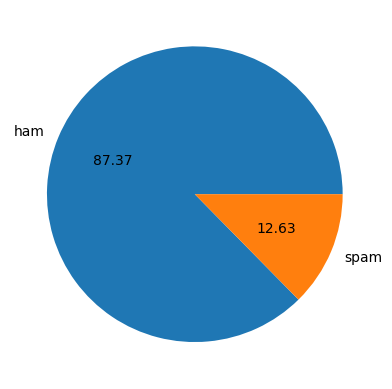

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
# data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alafi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)


In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
# num of sentences 
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

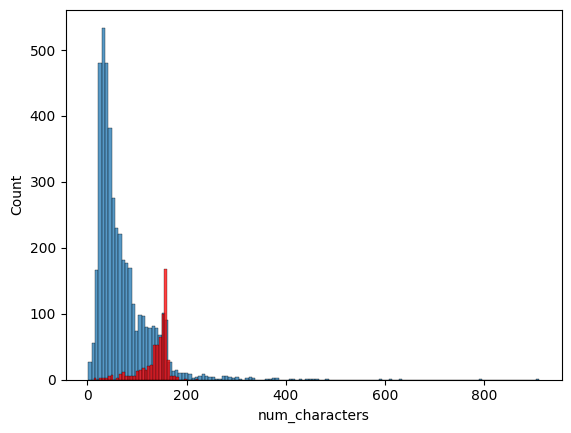

In [35]:
#histogram of ham and spam num characters
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

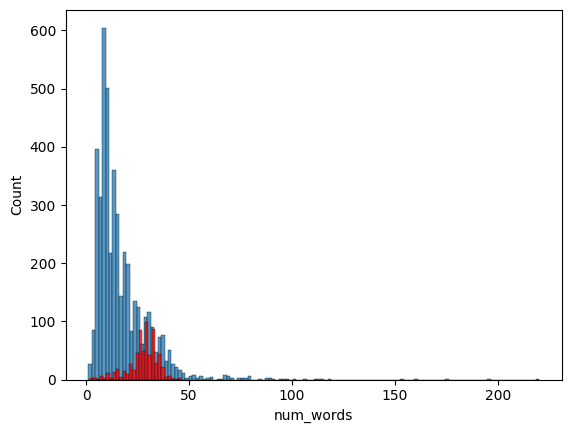

In [36]:
#histogram of ham and spam num words
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

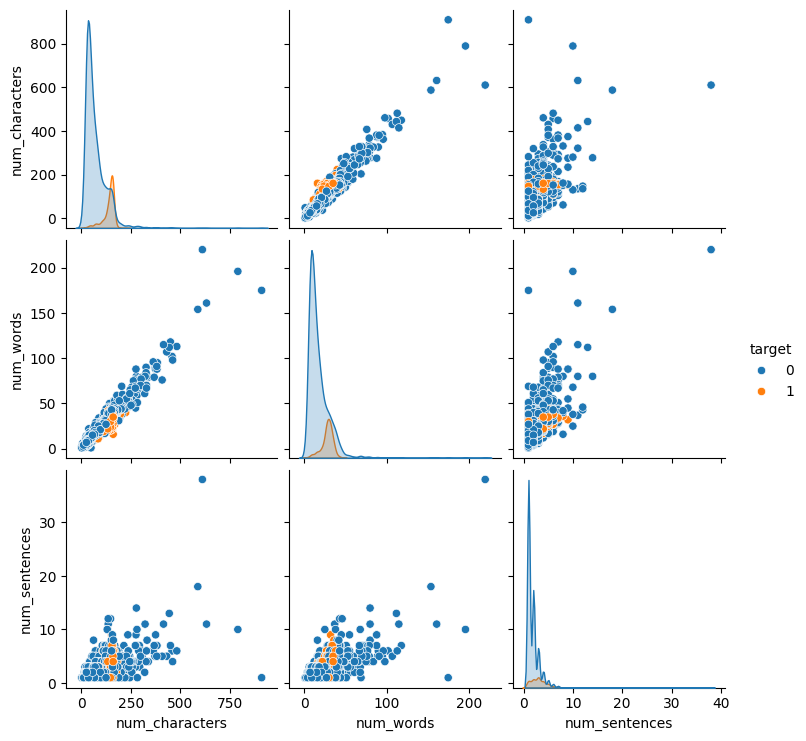

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

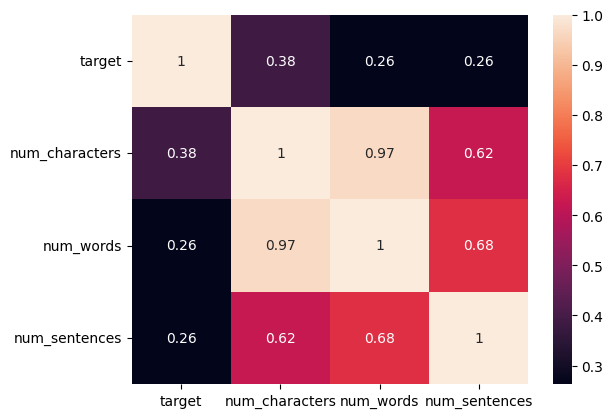

In [38]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True)


3.DATA PREPROCESSING
.Lower case
.Tokenization
.Removing special characters
.Removing stop words and punctuation
.Stemming

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Ensure necessary NLTK data is downloaded
#nltk.download('stopwords')
#nltk.download('punkt')

# Initialize the Porter Stemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize the text
    y = []

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:#removing stopwords and punctuation
            y.append(ps.stem(i))  # Stem the word

    return " ".join(y)




In [40]:
transform_text('I loved the YT lectures on Mchine Leraning. How about you?')

'love yt lectur mchine leran'

In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

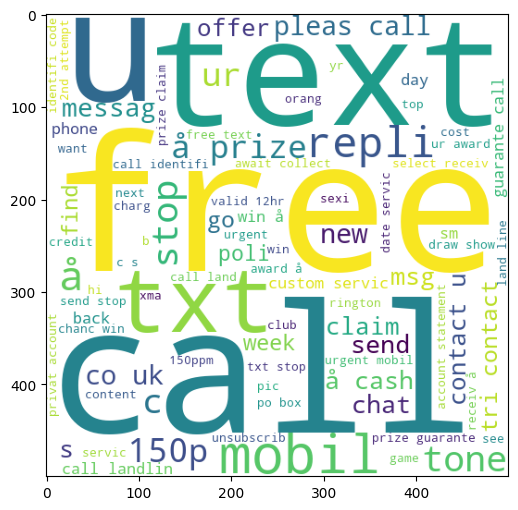

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

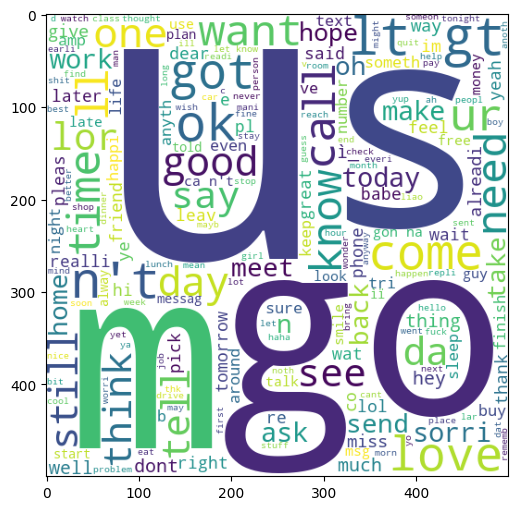

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [52]:
len(spam_corpus)

11083

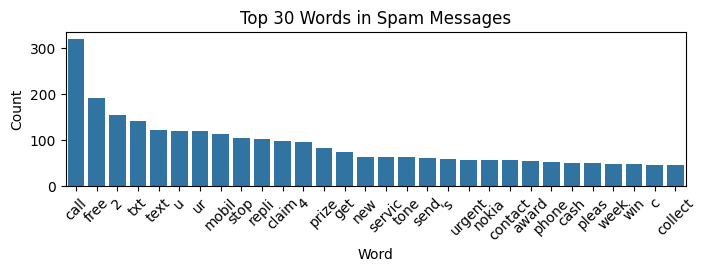

In [53]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the most common words in the spam corpus
spam_word_counts = Counter(spam_corpus).most_common(30)

# Convert the Counter object to a DataFrame
spam_word_df = pd.DataFrame(spam_word_counts, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(8, 2))
sns.barplot(x='Word', y='Count', data=spam_word_df)  # Use 'Word' and 'Count' columns directly
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Top 30 Words in Spam Messages')
plt.show()


In [54]:
ham_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
     ham_corpus.append(words)

In [55]:
len(ham_corpus)

11083

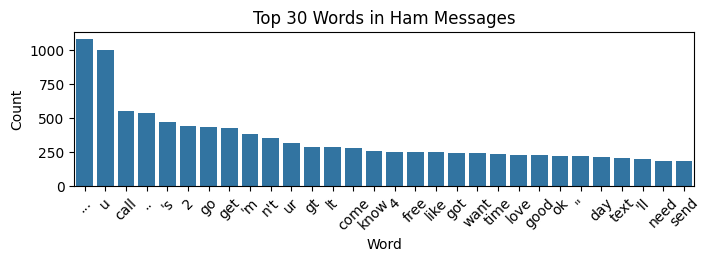

In [56]:
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Count the most common words in the ham corpus
ham_word_counts = Counter(ham_corpus).most_common(30)

# Convert the Counter object to a DataFrame
ham_word_df = pd.DataFrame(ham_word_counts, columns=['Word', 'Count'])

# Create a bar plot for ham messages
plt.figure(figsize=(8, 2))
sns.barplot(x='Word', y='Count', data=ham_word_df)  # Plot using 'Word' and 'Count' columns
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Top 30 Words in Ham Messages')
plt.show()

4.Model Building

In [57]:
#text vectorization
#using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [61]:
#appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [62]:
X.shape

(5169, 3000)

In [63]:
y = df['target'].values

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Make sure you rename the columns to match expected names
df = df.rename(columns={'Category': 'label', 'Message': 'text'})

# Vectorize
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Save vectorizer and model
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


KeyError: 'label'

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8820116054158608
[[789 107]
 [ 15 123]]
0.5347826086956522


In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[896   0]
 [ 13 125]]
1.0


In [71]:
#tfidf--->MNB

In [72]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Define the classifiers
svc_model = SVC(kernel='sigmoid', gamma=1.0)  # Support Vector Classifier
knc = KNeighborsClassifier()  # K-Nearest Neighbors
mnb = MultinomialNB()  # Naive Bayes
dtc = DecisionTreeClassifier()  # Decision Tree
lrc = LogisticRegression()  # Logistic Regression
rfc = RandomForestClassifier()  # Random Forest Classifier
abc = AdaBoostClassifier()  # AdaBoost Classifier
bc = BaggingClassifier()  # Bagging Classifier
etc = ExtraTreesClassifier()  # Extra Trees Classifier
gdbt = GradientBoostingClassifier()  # Gradient Boosting Classifier
xgb = XGBClassifier()  # XGBoost Classifier

# Add all classifiers to a dictionary
clfs = {
    'SVC': svc_model,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gdbt,
    'xgb': xgb
}

# Example usage:
# Fit a model and make predictions (replace X_train, y_train, X_test with your actual data)
# svc_model.fit(X_train, y_train)
# predictions = svc_model.predict(X_test)


In [74]:
# Function to train and evaluate classifiers
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)  # Fixed the typo here
    return accuracy, precision


In [75]:
train_classifier(svc_model,X_train,y_train,X_train,y_train)

(0.9876662636033857, 0.9833333333333333)

In [76]:
# Initialize accuracy and precision score lists
accuracy_scores = []
precision_scores = []

# Loop through the classifiers in the dictionary
for name, clf in clfs.items():
    # Call the train_classifier function with the correct arguments
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    # Print the results for the current classifier
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    # Append results to the respective lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.9758220502901354
Precision - 1.0
For DT
Accuracy - 0.9506769825918762
Precision - 0.7959183673469388
For LR
Accuracy - 0.9622823984526112
Precision - 0.9900990099009901
For RF
Accuracy - 0.9787234042553191
Precision - 0.9833333333333333
For AdaBoost
Accuracy - 0.9187620889748549
Precision - 0.8648648648648649
For BgC
Accuracy - 0.9574468085106383
Precision - 0.8790322580645161
For ETC
Accuracy - 0.9787234042553191
Precision - 0.9754098360655737
For GBDT
Accuracy - 0.9584139264990329
Precision - 0.9523809523809523
For xgb
Accuracy - 0.9729206963249516
Precision - 0.9365079365079365


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.978723,0.983333
8,ETC,0.978723,0.975410
0,SVC,0.975822,0.974790
2,NB,0.975822,1.000000
10,xgb,0.972921,0.936508
4,LR,0.962282,0.990099
9,GBDT,0.958414,0.952381
7,BgC,0.957447,0.879032
3,DT,0.950677,0.795918
6,AdaBoost,0.918762,0.864865


In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [80]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.978723
1,ETC,Accuracy,0.978723
2,SVC,Accuracy,0.975822
3,NB,Accuracy,0.975822
4,xgb,Accuracy,0.972921
5,LR,Accuracy,0.962282
6,GBDT,Accuracy,0.958414
7,BgC,Accuracy,0.957447
8,DT,Accuracy,0.950677
9,AdaBoost,Accuracy,0.918762


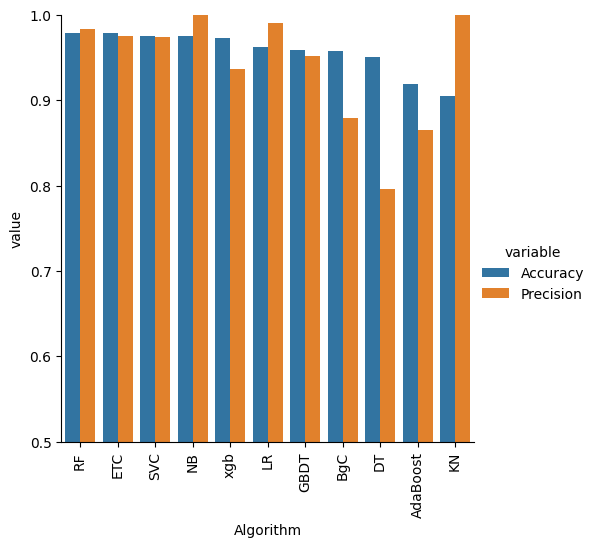

In [81]:
sns.catplot(x = 'Algorithm',y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
#model improve
#1. change the max_features parameter of TfIdf

In [83]:
#Voting Classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [84]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [85]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [86]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9838709677419355


In [87]:
#applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [88]:
from sklearn.ensemble import StackingClassifier

In [89]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [90]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
precision 0.9696969696969697


In [91]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))